<a href="https://colab.research.google.com/github/Mehran-shahzad/Data_Analytics/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('titanic_train.csv')

#**Basics Statics**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#**Handling Missing Data**

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-198-e0c0624688bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [ ]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

<ipython-input-199-c652ea9fa2d2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)


**I drop the Cabin Columns because 687 missing value out of 891**

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#**Convert Catagorical Variables**

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


**Convert Gender to Numeric**

In [ ]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

**Convert Embarked to Numeric**

In [ ]:
df['Embarked']=df['Embarked'].map({'S':2,'C':0,'Q':1})
#C = Cherbourg, Q = Queenstown, S = Southampton

**Convert Pclass to Ist,2nd,3rd class**

In [ ]:
df['Pclass']=df['Pclass'].map({1:'1st',2:'2nd',3:'3rd'})

#**Create New Columns for best Analysis**

**Create Family Size Column**

In [ ]:
df['FamilySize']=df['SibSp']+df['Parch']

**Create an IsAlone Column**

In [ ]:
df['IsAlone ']=(df['FamilySize']==0).astype(int)

**Create an AgeGroup Column**

In [ ]:
df['AgeGroup']=pd.cut(df['Age'],bins=[0,12,19,60,100],labels=['Child','Teenager','Adult','Senior'])

**Create an Fare Catagory**

In [ ]:
df['FareGroup']=pd.qcut(df['Fare'],q=4,labels=['Low','Medium','High','Very High'])

##**Drop Unnecessary Columns**

In [ ]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

#**Outliers**

###**Find outlier in the Fare column**

**IQR Method**

In [ ]:
q1=df['Fare'].quantile(0.25)
q3=df['Fare'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(7.9104, 31.0, 23.0896)

In [ ]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-26.724, 65.6344)

**Find Outliers**

In [ ]:
df.loc[(df['Fare']>upper_limit)|(df['Fare']<lower_limit)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,AgeGroup,FareGroup
1,1,1st,1,38.0,1,0,71.2833,0.0,1,0,Adult,Very High
27,0,1st,0,19.0,3,2,263.0000,2.0,5,0,Teenager,Very High
31,1,1st,1,28.0,1,0,146.5208,0.0,1,0,Adult,Very High
34,0,1st,0,28.0,1,0,82.1708,0.0,1,0,Adult,Very High
52,1,1st,1,49.0,1,0,76.7292,0.0,1,0,Adult,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3rd,0,28.0,8,2,69.5500,2.0,10,0,Adult,Very High
849,1,1st,1,28.0,1,0,89.1042,0.0,1,0,Adult,Very High
856,1,1st,1,45.0,1,1,164.8667,2.0,2,0,Adult,Very High
863,0,3rd,1,28.0,8,2,69.5500,2.0,10,0,Adult,Very High


**Triming__ Delete Outliers**

In [ ]:
new_df=df.loc[(df['Fare']<upper_limit)&(df['Fare']>lower_limit)]
print('before removing outliers:',len(df))
print('after removing outliers:',len(new_df))
print('outliers:',len(df)-len(new_df))

before removing outliers: 891
after removing outliers: 775
outliers: 116


<Axes: ylabel='Fare'>

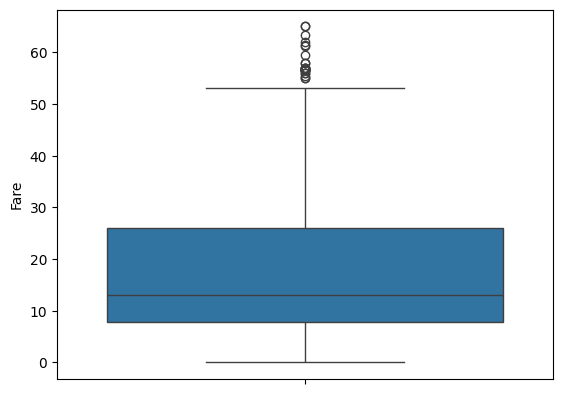

In [ ]:
sns.boxplot(new_df['Fare'])

**Capping__ Change Outlier value to upper or lower limit value**

In [ ]:
new_df=df.copy()
new_df.loc[(new_df['Fare']>upper_limit,'Fare')]=upper_limit
new_df.loc[(new_df['Fare']<lower_limit,'Fare')]=lower_limit

<Axes: ylabel='Fare'>

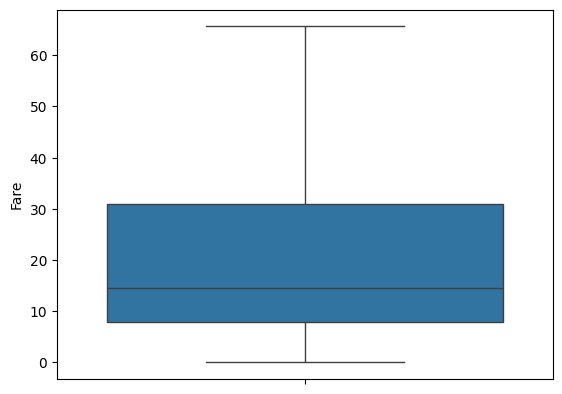

In [ ]:
sns.boxplot(new_df['Fare'])

In [ ]:
df.to_csv('titanic_cleaned.csv',index=False)
print('Cleaned dataset saved')

Cleaned dataset saved


#**Survived Count**

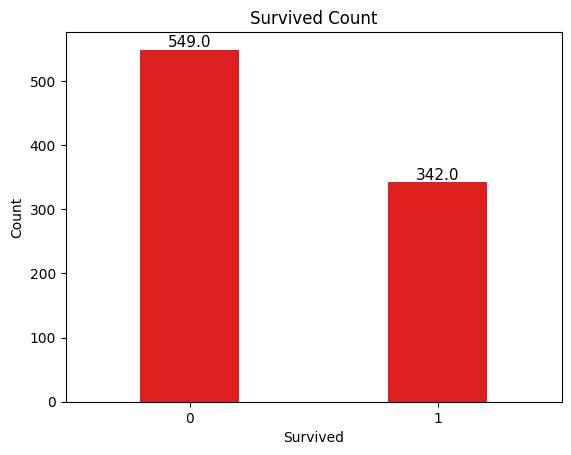

In [ ]:
sns.countplot(x='Survived',data=df,color='red',width=0.4)

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                   textcoords='offset points')
plt.show()

#**What is the overall survival rate of passengers**

In [ ]:
overall_survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival_rate:.2%}")

Overall Survival Rate: 38.38%


#**survival rate by passenger class (Pclass)**

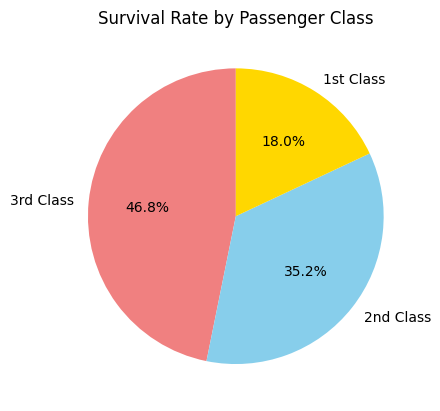

In [ ]:
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
plt.pie(survival_by_pclass, labels=['3rd Class', '2nd Class', '1st Class'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue', 'gold'])
plt.title("Survival Rate by Passenger Class")
plt.show()

#**Survival Rate By Gender**

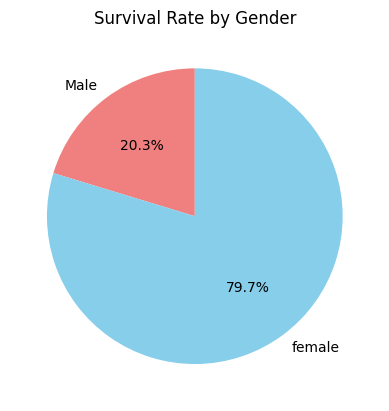

In [ ]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
plt.pie(survival_by_gender, labels=['Male', 'female'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title("Survival Rate by Gender")
plt.show()

#**Age distribution by Survival Status**

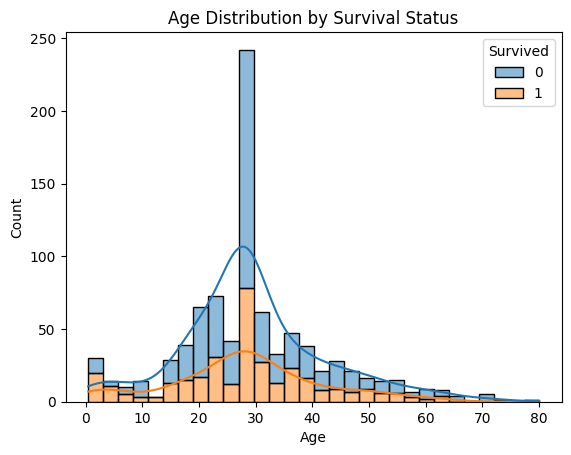

In [ ]:

sns.histplot(data=df, x="Age", hue="Survived", kde=True, multiple="stack")
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#**Survival Rate by Age Group**

<ipython-input-224-e15e4ea802cf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean()
<ipython-input-224-e15e4ea802cf>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="AgeGroup", y="Survived", data=df, ci=None,width=0.4)


AgeGroup
Child       0.579710
Teenager    0.410526
Adult       0.365957
Senior      0.227273
Name: Survived, dtype: float64


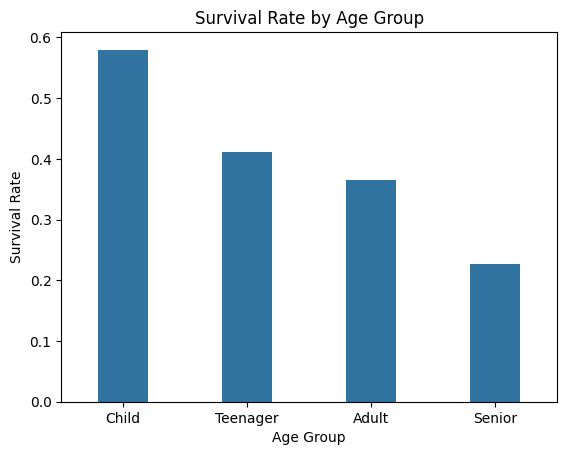

In [ ]:
survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean()
print(survival_by_agegroup)
sns.barplot(x="AgeGroup", y="Survived", data=df, ci=None,width=0.4)
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.show()

#**Survival Rateby Fare Group**

<ipython-input-225-f493e4bd7666>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_faregroup = df.groupby('FareGroup')['Survived'].mean()
<ipython-input-225-f493e4bd7666>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="FareGroup", y="Survived", data=df, ci=None,width=0.4, order=["Low", "Medium", "High", "Very High"])


FareGroup
Low          0.197309
Medium       0.303571
High         0.454955
Very High    0.581081
Name: Survived, dtype: float64


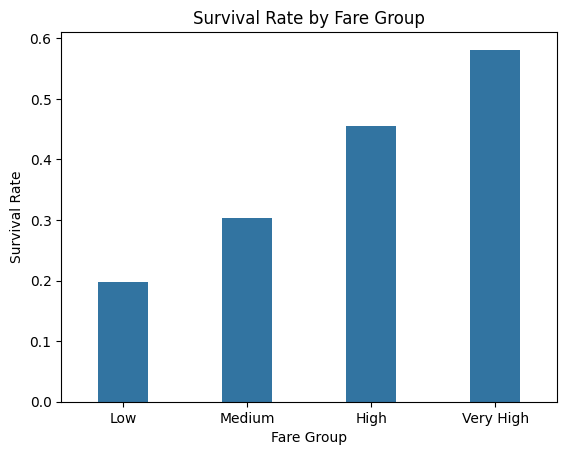

In [ ]:

survival_by_faregroup = df.groupby('FareGroup')['Survived'].mean()
print(survival_by_faregroup)
sns.barplot(x="FareGroup", y="Survived", data=df, ci=None,width=0.4, order=["Low", "Medium", "High", "Very High"])
plt.title("Survival Rate by Fare Group")
plt.ylabel("Survival Rate")
plt.xlabel("Fare Group")
plt.show()


#**Survival Rate by IsAlone**



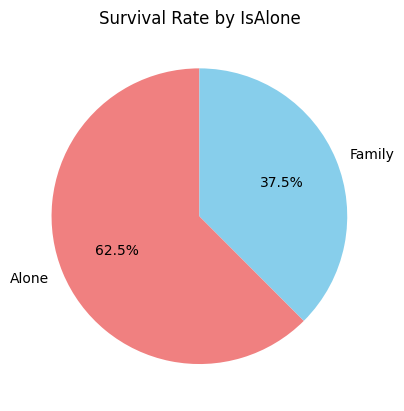

In [ ]:

survival_by_isalone = df.groupby('IsAlone ')['Survived'].mean()
plt.pie(survival_by_isalone, labels=['Alone', 'Family'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title("Survival Rate by IsAlone")
plt.show()

#**Distribution of Family Size**

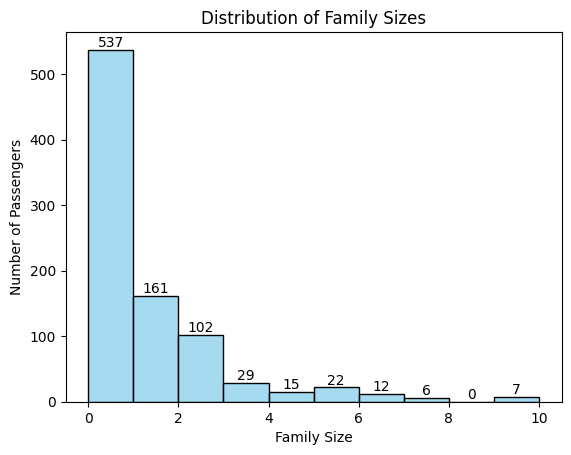

In [ ]:
average_family_size = df['FamilySize'].mean()
ax = sns.histplot(data=df, x="FamilySize", bins=10, kde=False, color="skyblue")
plt.title("Distribution of Family Sizes")
plt.xlabel("Family Size")
plt.ylabel("Number of Passengers")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

#**Distribution of FareGroups Across Pclass Categories**

<ipython-input-235-18010eea0bfa>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faregroup_pclass_distribution = df.groupby(['Pclass', 'FareGroup']).size().unstack()


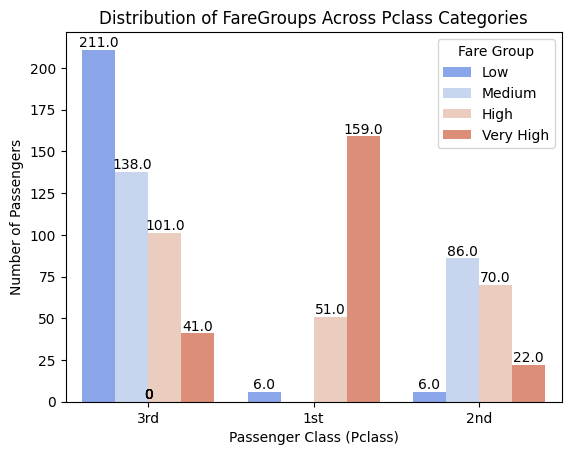

In [ ]:
faregroup_pclass_distribution = df.groupby(['Pclass', 'FareGroup']).size().unstack()
ax = sns.countplot(x="Pclass", hue="FareGroup", data=df, palette="coolwarm")
plt.title("Distribution of FareGroups Across Pclass Categories")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Number of Passengers")
plt.legend(title="Fare Group", loc="upper right")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

#**Passenger Distribution by Embarkation Port**

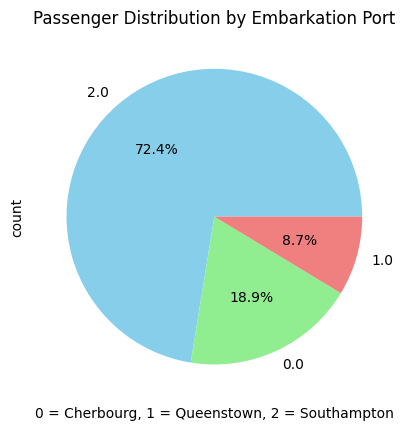

In [ ]:
embarked_distribution = df['Embarked'].value_counts()
embarked_distribution.plot(kind='pie', autopct='%1.1f%%',colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title("Passenger Distribution by Embarkation Port")
plt.xlabel("0 = Cherbourg, 1 = Queenstown, 2 = Southampton")
plt.show()

#**FINISH ---------------------------finish------------------------------FINISH**